# Verify the weight of u+p

## Prepare environment and  define parameters 

In [1]:
is_colab = False
import sys

if is_colab:
    !pip install -q torch==1.8.1
    !pip install -q torchvision==0.4.0
    !pip install -q qiskit==0.14.0
    !pip install qfnn


import torch
import torchvision

import qiskit
from qiskit import  QuantumCircuit, ClassicalRegister
import numpy as np
import functools

sys.path.append('../')
from src.qfnn.qf_fb.q_output import fire_ibmq,analyze,add_measure
from src.qfnn.qf_circ.n_lyr_circ import N_LYR_Circ
from src.qfnn.qf_circ.u_lyr_circ import U_LYR_Circ
from src.qfnn.qf_circ.p_lyr_circ import P_LYR_Circ,P_Neuron_Circ
from src.qfnn.qf_fb.c_input import load_data,to_quantum_matrix

print = functools.partial(print, flush=True)






## Load data

## Inference

In [3]:
import math
################ Weiwen on 12-30-2020 ################
# Parameters of the trained model
# The training procedure will be found in another repo
# https://github.com/weiwenjiang/QuantumFlow
######################################################

# Model initialization
weight_1 = torch.tensor([[1.,  -1.,  1.,  1.],[-1., 1., 1., 1.]])
weight_2 = torch.tensor([[1.,  -1.],[-1.,  -1.]])
angle = [0,0,0,0]
norm_flag = [True,False]
norm_para = torch.tensor([0.3060,0.6940])



In [6]:
################ Weiwen on 12-30-2020 ################
# Generate the circuit of u-layer
######################################################
#define your input and output number
input_list = []
aux_list = []
output_list = []
circuit = QuantumCircuit()
for i in range(2):
    p_layer = P_Neuron_Circ(4) 
    #init circuit
    #add input qubit to your circuit
    inps = p_layer.add_input_qubits(circuit,'p'+str(i))
    input_list.append(inps)
    #add auxiliary qubit to your circuit
    aux =p_layer.add_aux(circuit,'a'+str(i))
    aux_list.append(aux)
    #add output qubit to your circuit
    output = p_layer.add_out_qubits(circuit,'p_out'+str(i))
    output_list.append(output)
    #add ulayer to your circuit
    p_layer.forward(circuit,[weight_1[i]],input_list[i][0],output_list[i],angle,aux_list[i])

circuit.draw('text',fold = 300)



┌───────┐      ░                              ░                         ░                         ░               ░                 ░                              ░                         ░                         ░               ░                
p00_qbit_0: ┤ Ry(0) ├──────░──────────────────────────────░─────────────────────────░─────────────────────────░───■───────■───░─────────────────░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
            ├───────┤┌───┐ ░                              ░                         ░                         ░   │       │   ░                 ░                              ░                         ░                         ░               ░                
p00_qbit_1: ┤ Ry(0) ├┤ X ├─░──────────────────────────────░─────────────────────────░────────■───────■────────░───┼───────┼───░─────────────────░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
            ├───────┤└───┘ ░                              ░                         ░        │       │        ░   │       │   ░                 ░                              ░                         ░                         ░               ░                
p00_qbit_2: ┤ Ry(0) ├──────░──────────────────────────────░────────■───────■────────░────────┼───────┼────────░───┼───────┼───░─────────────────░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
            ├───────┤      ░                              ░        │       │        ░        │       │        ░   │       │   ░                 ░                              ░                         ░                         ░               ░                
p00_qbit_3: ┤ Ry(0) ├──────░─────────────■───────■────────░────────┼───────┼────────░────────┼───────┼────────░───┼───────┼───░─────────────────░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
            └───────┘      ░ ┌───┐┌───┐  │       │  ┌───┐ ░ ┌───┐  │       │  ┌───┐ ░        │       │        ░   │       │   ░ ┌───┐┌───┐      ░                              ░                         ░                         ░               ░                
      a0_0: ───────────────░─┤ H ├┤ X ├──■───────■──┤ X ├─░─┤ X ├──■───────■──┤ X ├─░────────■───────■────────░───■───────■───░─┤ H ├┤ X ├──■───░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
                           ░ ├───┤├───┤  │       │  ├───┤ ░ └───┘  │       │  └───┘ ░ ┌───┐  │       │  ┌───┐ ░   │       │   ░ ├───┤├───┤  │   ░                              ░                         ░                         ░               ░                
      a0_1: ───────────────░─┤ H ├┤ X ├──┼───■───┼──┤ X ├─░────────┼───■───┼────────░─┤ X ├──┼───■───┼──┤ X ├─░───┼───■───┼───░─┤ H ├┤ X ├──■───░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
                           ░ └───┘└───┘┌─┴─┐ │ ┌─┴─┐└───┘ ░      ┌─┴─┐ │ ┌─┴─┐      ░ └───┘┌─┴─┐ │ ┌─┴─┐└───┘ ░ ┌─┴─┐ │ ┌─┴─┐ ░ └───┘└───┘  │   ░                              ░                         ░                         ░               ░                
      a0_2: ───────────────░───────────┤ X ├─■─┤ X ├──────░──────┤ X ├─■─┤ X ├──────░──────┤ X ├─■─┤ X ├──────░─┤ X ├─■─┤ X ├─░─────────────┼───░──────────────────────────────░─────────────────────────░─────────────────────────░───────────────░────────────────
                           ░           └───┘   └───┘      ░      └───┘   └───┘      ░      └───┘   └───┘      ░ └───┘   └───┘ ░             │   ░                              ░                         ░                         ░               ░                
      a0_3: ───────────────░──────────────────────────────░─────────────────────────░────────────

Output layer created!


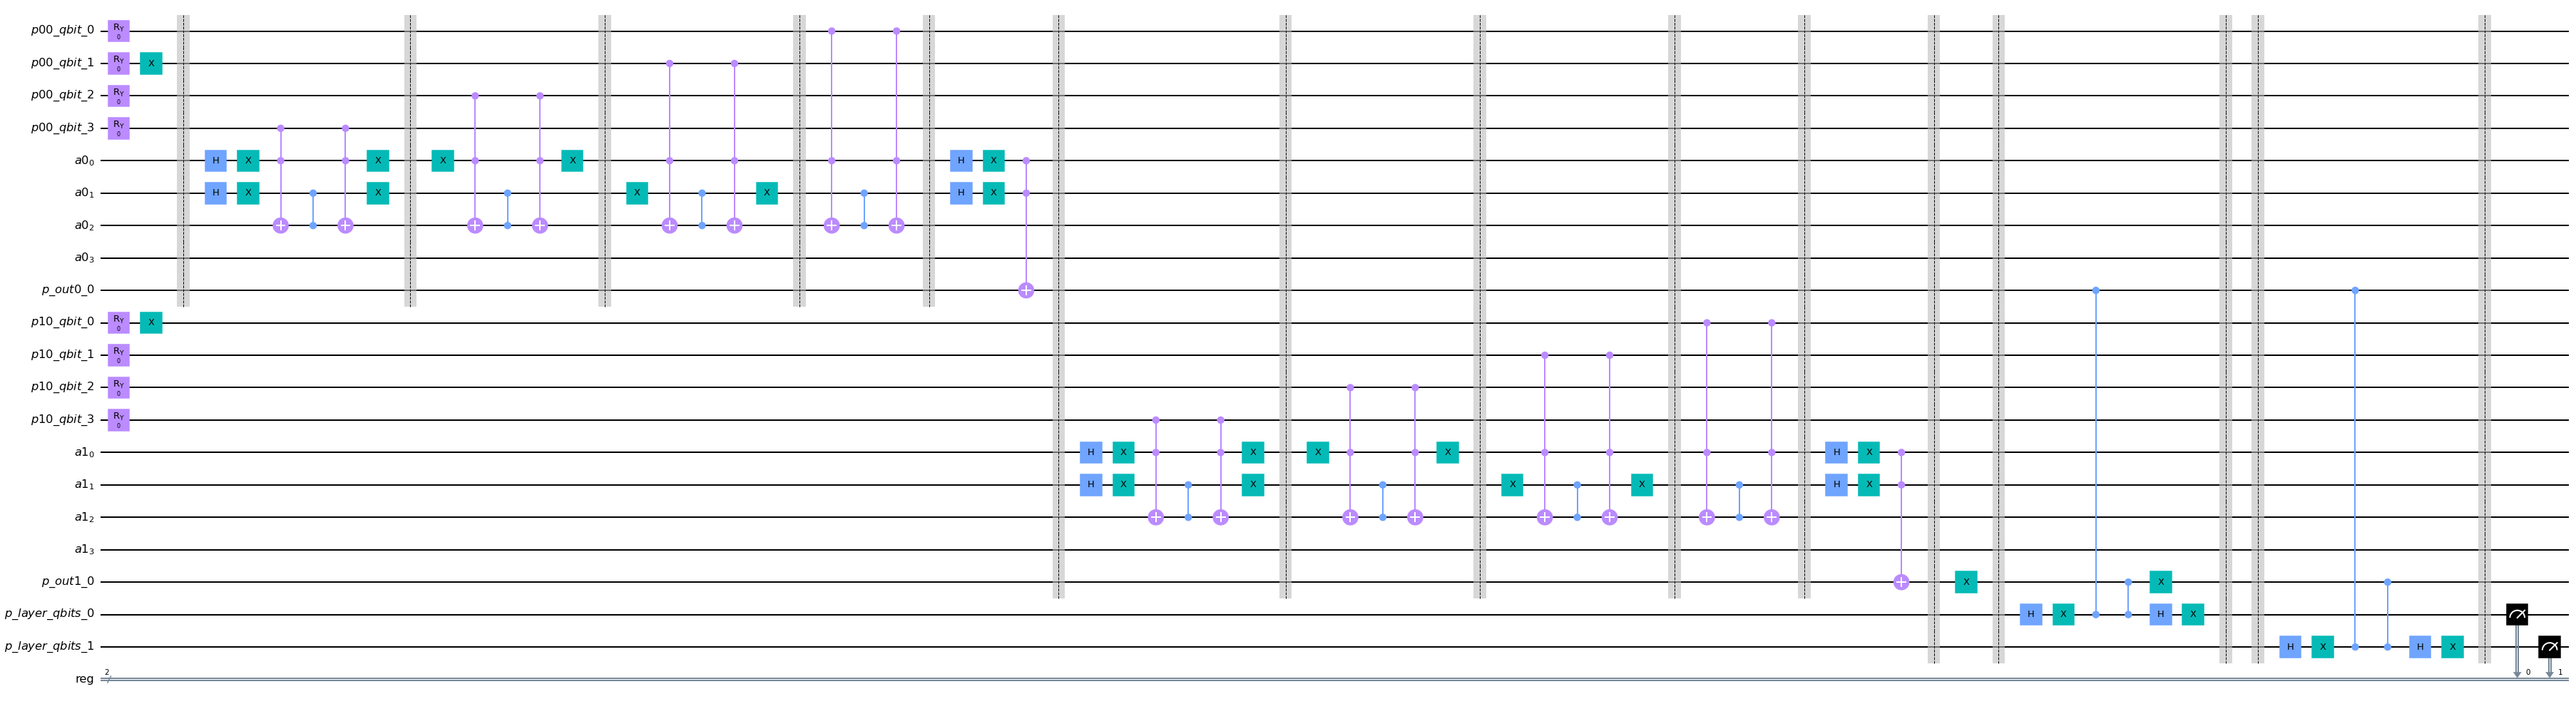

In [4]:
################ Weiwen on 12-30-2020 ################
# Quantum circuit implementation of the output layer
# fundamentals, please see our Nature Communication
# paper (P-LYR) https://arxiv.org/pdf/2006.14815.pdf
######################################################


p_layer = P_LYR_Circ(2,2)
p_layer_output = p_layer.add_out_qubits(circuit)
circuit.barrier()

p_layer.forward(circuit,weight_2,output_list,p_layer_output)


# norm = N_LYR_Circ(2)
# norm_qubit = norm.add_norm_qubits(circuit)
# norm_output_qubit = norm.add_out_qubits(circuit)
# norm.forward(circuit,p_layer_output,norm_qubit,norm_output_qubit,norm_flag,norm_para)


add_measure(circuit,p_layer_output,'reg')

print("Output layer created!")

circuit.draw('mpl',fold =300)

In [5]:
# result
qc_shots=8192
opt_counts = fire_ibmq(circuit,qc_shots,True)
(opt_mycount,bits) = analyze(opt_counts)
opt_class_prob=[]
for b in range(bits):
    opt_class_prob.append(float(opt_mycount[b])/qc_shots)
print("Result :",opt_class_prob)

Result : [0.380859375, 0.619140625]


In [6]:
from src.qfnn.qf_net.p_lyr import P_LYR
import torch.nn as nn



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 =P_LYR(4, 2, bias=False)
        self.fc2 =P_LYR(2, 2, bias=False)
    def forward(self,x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = Net()

state_dict= model.state_dict()
state_dict["fc1.weight"] = weight_1
state_dict["fc2.weight"] = weight_2
model.load_state_dict(state_dict)
for item in model.named_parameters():
    print("model.parameter:",item)
state = torch.tensor([[0,0,0,0]],dtype= torch.float)
output = model.forward(state)
print(output)

model.parameter: ('fc1.weight', Parameter containing:
tensor([[ 1., -1.,  1.,  1.],
        [-1.,  1.,  1.,  1.]], requires_grad=True))
model.parameter: ('fc2.weight', Parameter containing:
tensor([[ 1., -1.],
        [ 1.,  1.]], requires_grad=True))
tensor([[0.3750, 0.6250]], grad_fn=<DivBackward0>)
